# ERA5 Data Analysis (Test Run)

This notebook serves as a trial run in downloading, processing and analysing ERA5 data files, following on from our 2nd meeting (14/10/25), guided by Max's "ERA5-Land Tutorial" and Anvi's "ERA5 Monthly Averaged Data Analysis" notebooks:

- Anvi: https://github.com/AnviJoy/ERA5-Data-Analysis/blob/main/ERA5Analysis.ipynb
- Max: https://github.com/maaax-j/MSc/blob/main/ERA5%3AORAS5%20Tutorial.ipynb

# 1. Simple file

I first downloaded a simple file:
- 2m Dewpoint Temperature
- 2024 Only
- NetCDF4 format
- Geographical area over UK only:
    - North: 61deg, West: -8deg, South: 49deg, East: 2deg

Below I import the relevant modules (as per Max's notebook). I faced significant hurdles here with ensuring the versions of each module were compatable. This actually took multiple days, most of which was spent manipulating conda prompt, powershell and command prompt until I found the actual fix:

1. Anaconda Navigator setup
    1. Open Anaconda Navigator (application)
    1. Preferances -> Channels -> Add 'conda-forge'
    1. Enable chanel priority = Strict
1. Create environment
    1. Environments -> Create
    1. Name: climate, Python version: 3.11
    1. Change dropdown from 'Installed' to 'Not installed'
    1. With 'conda-forge' selected, search for and install the core packages:
        1. numpy=1.26
        1. pandas=2.2
        1. xarray=2024.7
        1. matplotlib=3.8
        1. netcdf4, h5netcdf, cftime
        1. ipykernel
        1. dask, bottleneck, numexpr
        1. cartopy, regionmask
        1. eccodes, cfgrib
        1. xesmf, cdsapi
1. Register Kernel
    1. Select 'climate' -> Open Terminal
    1. Paste the following: 'python -m ipykernel install --user --name climate --display-name "Python (climate)"'
    1. Launch Jupyter from 'climate' environment

The next issue I faced was resolved by pasting the following in the 'climate' environment terminal: conda install -c conda-forge -y "libblas=*=*openblas" "numpy=1.26.*" "pandas=2.2.*" "matplotlib=3.8.*"

In [5]:
%pip install regionmask dask
%pip install "dask[array]>=2024.5.0"
%pip install "scikit-image==0.22.*" "scipy==1.11.*"

# Module used for creating masks of geospacial regions

import xarray as xr
import regionmask
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs # Used for plotting maps


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


With the modules imported I then loaded the data file:

In [12]:
# Loading the data

file_path = r"C:\Users\itsna\OneDrive\Desktop\MSc Work\2m_dewpoint_2024.nc"

# Loading dataset

ds = xr.open_dataset(r"C:\Users\itsna\OneDrive\Desktop\MSc Work\2m_dewpoint_2024.nc")

# Inspecting the dataset

print(ds)

<xarray.Dataset> Size: 589kB
Dimensions:     (valid_time: 12, latitude: 121, longitude: 101)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 96B 2024-01-01 ... 2024-12-01
  * latitude    (latitude) float64 968B 61.0 60.9 60.8 60.7 ... 49.2 49.1 49.0
  * longitude   (longitude) float64 808B -8.0 -7.9 -7.8 -7.7 ... 1.7 1.8 1.9 2.0
    expver      (valid_time) <U4 192B ...
Data variables:
    d2m         (valid_time, latitude, longitude) float32 587kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-15T15:16 GRIB to CDM+CF via cfgrib-0.9.1...


In [14]:
# Printing variables listed in the file
print(ds.data_vars)

Data variables:
    d2m      (valid_time, latitude, longitude) float32 587kB ...


In [16]:
# Printing the file dimensions
print(ds.dims)

FrozenMappingWarningOnValuesAccess({'valid_time': 12, 'latitude': 121, 'longitude': 101})


In [17]:
# Printing the attributes of the dataset
print(ds.attrs)

{'GRIB_centre': 'ecmf', 'GRIB_centreDescription': 'European Centre for Medium-Range Weather Forecasts', 'GRIB_subCentre': 0, 'Conventions': 'CF-1.7', 'institution': 'European Centre for Medium-Range Weather Forecasts', 'history': '2025-10-15T15:16 GRIB to CDM+CF via cfgrib-0.9.15.0/ecCodes-2.42.0 with {"source": "data.grib", "filter_by_keys": {"stream": ["moda"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}'}


In [18]:
# Finally printing all of the data within
print(ds.d2m)

<xarray.DataArray 'd2m' (valid_time: 12, latitude: 121, longitude: 101)> Size: 587kB
[146652 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 96B 2024-01-01 ... 2024-12-01
  * latitude    (latitude) float64 968B 61.0 60.9 60.8 60.7 ... 49.2 49.1 49.0
  * longitude   (longitude) float64 808B -8.0 -7.9 -7.8 -7.7 ... 1.7 1.8 1.9 2.0
    expver      (valid_time) <U4 192B ...
Attributes: (12/31)
    GRIB_paramId:                             168
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      12221
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_gridType:                            regular_ll
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre dewpoint temperature
    units: 

I had some issues loading the data using chunking with Dask, so I followed Anvi's notebook and converted the data to numpy arrays instead

In [21]:
# Converting data values to numpy array
data = ds.d2m.values

In [22]:
# Printing the shape of the array
print(data.shape)

(12, 121, 101)


In [23]:
# Printing the whole array
print(data)

[[[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  ...
  [      nan       nan       nan ... 274.22656 274.18555 274.14453]
  [      nan       nan       nan ... 274.33203 274.32422 274.32227]
  [      nan       nan       nan ... 274.45898 274.47266 274.50586]]

 [[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  ...
  [      nan       nan       nan ... 279.47974 279.43677 279.386  ]
  [      nan       nan       nan ... 279.5227  279.5188  279.52466]
  [      nan       nan       nan ... 279.5852  279.60474 279.64185]]

 [[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan

In [25]:
# Extracting temperature data from the dataset
temp_data = ds['d2m']

# Printing to see what it looks like
print(temp_data)

<xarray.DataArray 'd2m' (valid_time: 12, latitude: 121, longitude: 101)> Size: 587kB
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ..., 274.32422, 274.32227],
        [      nan,       nan, ..., 274.47266, 274.50586]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ..., 279.5188 , 279.52466],
        [      nan,       nan, ..., 279.60474, 279.64185]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ..., 279.2616 , 279.24792],
        [      nan,       nan, ..., 279.34753, 279.3573 ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan

I then made some simple plots using this file. Below is a plot of all the NaN values in the dataset, effectively creating a map of the UK (purple if has temperature value, yellow if no value).

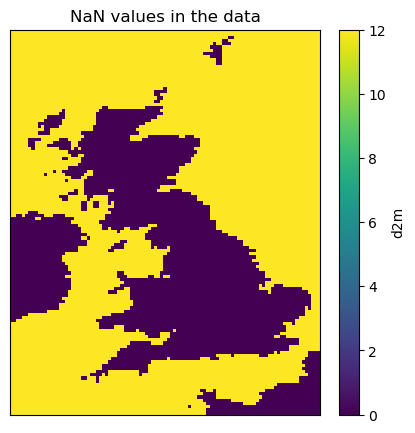

In [27]:
plt.figure(figsize=(5, 5))
ax = temp_data.isnull().sum(dim='valid_time').plot(add_colorbar=True)
plt.title('NaN values in the data')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.show()

# 2. File with multiple variables

## 2.1. Inital inspection

I then downloaded a larger file containing the variables below:

- 2m dewpoint temperature
- 2m temperature
- Skin temperature
- Soil temperature level 1
- Soil temperature level 2
- Soil temperature level 3
- Soil temperature level 4
- Skin reservoir content
- Volumetric soil water layer 1
- Volumetric soil water layer 2
- Volumetric soil water layer 3
- Volumetric soil water layer 4
- 10m u-component of wind
- 10m v-component of wind
- Surface pressure
- Total precipitation

I did this across all years and months over the same geographical area as the first file.

In [37]:
# Importing dataset
ds = xr.open_dataset(r"C:\Users\itsna\OneDrive\Desktop\MSc Work\larger_test_file.nc")

In [38]:
# Printing the variables in the dataset
print(ds.data_vars)

Data variables:
    d2m      (valid_time, latitude, longitude) float32 44MB ...
    t2m      (valid_time, latitude, longitude) float32 44MB ...
    skt      (valid_time, latitude, longitude) float32 44MB ...
    stl1     (valid_time, latitude, longitude) float32 44MB ...
    stl2     (valid_time, latitude, longitude) float32 44MB ...
    stl3     (valid_time, latitude, longitude) float32 44MB ...
    stl4     (valid_time, latitude, longitude) float32 44MB ...
    src      (valid_time, latitude, longitude) float32 44MB ...
    swvl1    (valid_time, latitude, longitude) float32 44MB ...
    swvl2    (valid_time, latitude, longitude) float32 44MB ...
    swvl3    (valid_time, latitude, longitude) float32 44MB ...
    swvl4    (valid_time, latitude, longitude) float32 44MB ...
    u10      (valid_time, latitude, longitude) float32 44MB ...
    v10      (valid_time, latitude, longitude) float32 44MB ...
    sp       (valid_time, latitude, longitude) float32 44MB ...
    tp       (valid_time

In [39]:
# Printing the dimensions in the dataset
print(ds.dims)

FrozenMappingWarningOnValuesAccess({'valid_time': 909, 'latitude': 121, 'longitude': 101})


In [40]:
# Printing the attributes of the dataset
print(ds.attrs)

{'GRIB_centre': 'ecmf', 'GRIB_centreDescription': 'European Centre for Medium-Range Weather Forecasts', 'GRIB_subCentre': 0, 'Conventions': 'CF-1.7', 'institution': 'European Centre for Medium-Range Weather Forecasts', 'history': '2025-10-18T12:29 GRIB to CDM+CF via cfgrib-0.9.15.0/ecCodes-2.42.0 with {"source": "data.grib", "filter_by_keys": {"stream": ["moda"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}'}


In [41]:
# Printing just the 2m dewpoint data
print(ds.d2m)

<xarray.DataArray 'd2m' (valid_time: 909, latitude: 121, longitude: 101)> Size: 44MB
[11108889 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 7kB 1950-01-01 ... 2025-09-01
  * latitude    (latitude) float64 968B 61.0 60.9 60.8 60.7 ... 49.2 49.1 49.0
  * longitude   (longitude) float64 808B -8.0 -7.9 -7.8 -7.7 ... 1.7 1.8 1.9 2.0
    expver      (valid_time) <U4 15kB ...
Attributes: (12/31)
    GRIB_paramId:                             168
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      12221
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_gridType:                            regular_ll
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre dewpoint temperature
    units

In [42]:
data = ds.d2m.values

# Printing the shape and data in the numpy array
print(data.shape, data)

(909, 121, 101) [[[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  ...
  [      nan       nan       nan ... 272.18994 272.1333  272.07275]
  [      nan       nan       nan ... 272.27588 272.23096 272.1958 ]
  [      nan       nan       nan ... 272.34033 272.30908 272.2915 ]]

 [[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  ...
  [      nan       nan       nan ... 276.20435 276.14185 276.07153]
  [      nan       nan       nan ... 276.29028 276.27075 276.26685]
  [      nan       nan       nan ... 276.39966 276.40942 276.4524 ]]

 [[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan    

With the dataset installed I created the same NaN value map (as above).

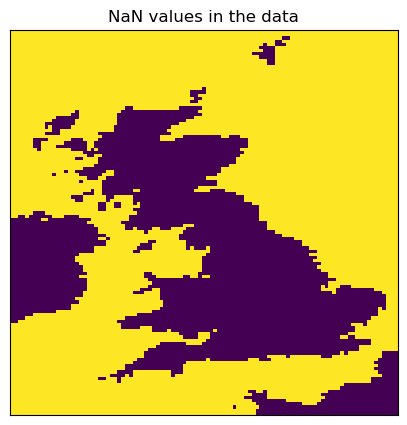

In [43]:
temp_data = ds['d2m']

plt.figure(figsize=(5, 5))
ax = temp_data.isnull().sum(dim='valid_time').plot(add_colorbar=False)
plt.title('NaN values in the data')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.show()

## 2.2. Maps

I then created a map of the chosen variable in the dataset (2m dewpoint temperature):

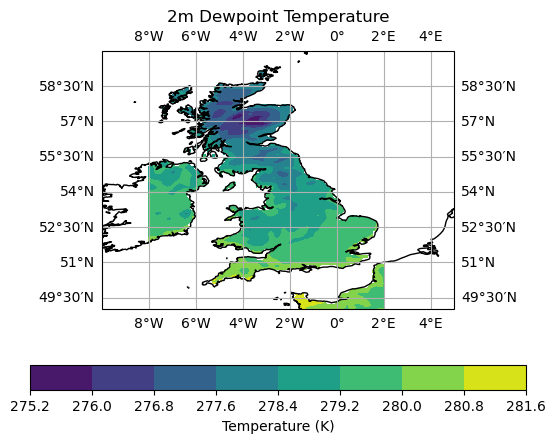

<Figure size 640x480 with 0 Axes>

In [44]:
import cartopy.crs as ccrs


long = ds.variables['longitude'][:]
lat = ds.variables['latitude'][:]

data = ds.d2m.values
mean_temp = np.mean(data, axis=0)

ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])
ax.set_title('2m Dewpoint Temperature')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(long, lat, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Temperature (K)")

plt.figure()
plt.show()

## 2.3. Plots

I then moved on to creating a plot for the chosen variable in the dataset:

Slope: 0.01625 ± 0.00005 K per year


C:\Users\itsna\anaconda3\envs\climate\Lib\site-packages\skimage\measure\block.py:90: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


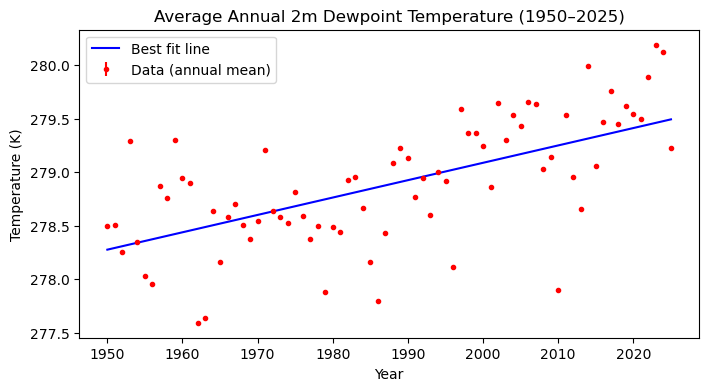

In [45]:
from skimage.measure import block_reduce
from scipy.optimize import curve_fit


data = ds.d2m.values  
mean_value = np.nanmean(data)

temp = block_reduce(data, 
                    block_size=(12, 1, 1), 
                    func=np.nanmean, 
                    cval=mean_value)

temp_mean = np.nanmean(temp, axis=(1, 2))
time = np.arange(1950, 2026)

def linear_model(x, m, b):
    return m * x + b


spatial_std = np.nanstd(temp, axis=(1, 2))
n_points = temp.shape[1] * temp.shape[2]
y_err = spatial_std / np.sqrt(n_points)


popt, pcov = curve_fit(linear_model, time, temp_mean, sigma=y_err, absolute_sigma=True)

m, b = popt
m_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])


print(f"Slope: {m:.5f} ± {m_err:.5f} K per year")


plt.figure(figsize=(8,4))
plt.errorbar(time, temp_mean, yerr=y_err, fmt='.', color='red', label='Data (annual mean)')
plt.plot(time, linear_model(time, *popt), 'b-', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.title('Average Annual 2m Dewpoint Temperature (1950–2025)')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

## 2.4. Histograms

Finally, I created a histogram of the data:

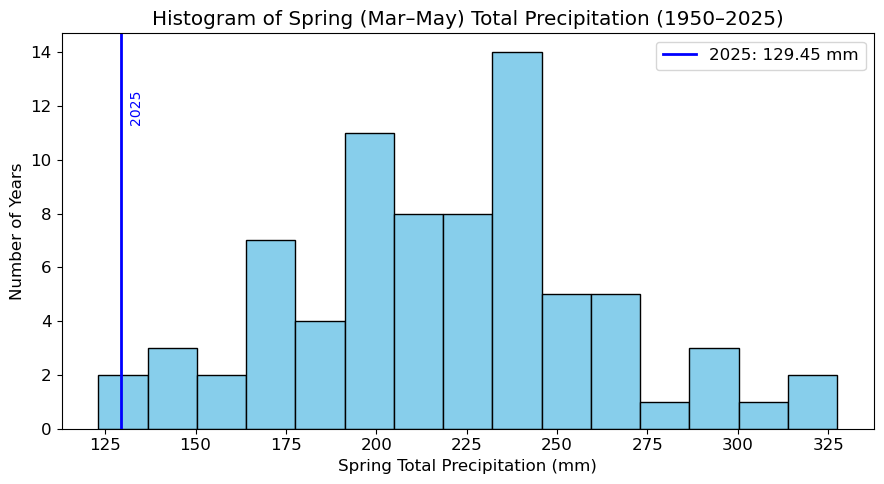

In [47]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from calendar import monthrange

tp_data = ds.tp
time_values = ds.valid_time.values

months = np.array([t.astype('datetime64[M]').item().month for t in time_values])
years = np.array([t.astype('datetime64[Y]').astype(int) + 1970 for t in time_values])

spring_totals = []
spring_years = []

for yr in np.unique(years):
    mask = (years == yr) & np.isin(months, [3, 4, 5])
    if np.sum(mask) == 3:
        indices = np.where(mask)[0]
        weighted_sum = 0
        for idx in indices:
            date = time_values[idx].astype('datetime64[M]').item()
            days = monthrange(date.year, date.month)[1]
            val = tp_data.isel(valid_time=idx) * days
            weighted_sum += val

        total_mm = weighted_sum.mean(dim=("latitude", "longitude"), skipna=True).values.item() * 1000
        spring_totals.append(total_mm)
        spring_years.append(yr)

spring_totals = np.array(spring_totals)
spring_years = np.array(spring_years)

value_2025 = None
if 2025 in spring_years:
    index_2025 = np.where(spring_years == 2025)[0][0]
    value_2025 = spring_totals[index_2025]

plt.figure(figsize=(9, 5))
n, bins, _ = plt.hist(spring_totals, bins=15, color='skyblue', edgecolor='black')
plt.xlabel("Spring Total Precipitation (mm)")
plt.ylabel("Number of Years")
plt.title("Histogram of Spring (Mar–May) Total Precipitation (1950–2025)")

if value_2025 is not None:
    ymax = n.max()
    plt.axvline(value_2025, color='b', linestyle='-', linewidth=2, label=f"2025: {value_2025:.2f} mm")
    plt.text(value_2025 + (bins[-1] - bins[0]) * 0.01,
             ymax * 0.9,
             '2025',
             color='b',
             rotation=90,
             va='top',
             ha='left',
             fontsize=10)
    plt.legend()

plt.tight_layout()
plt.show()

# 3. Covering the atlantic ocean

Having played around with the smaller files I tried to download a file covering the UK, east coast of NA and the entire atlantic ocean.

To do this I used the following coordinates:
- North: 65
- West: -85
- South: 20
- East: 20

To keep the file size down I chose to download a file with just 2m dewpoint temperature selected (ended up being 4.14GB).

Only one minor adjustment was needed to make the plot cover the whole region in the file, replacing "ax.set_extent([-10, 5, 49, 60])" with "ax.set_extent([-85, 20, 20, 65])" to cover our new geospacial area.

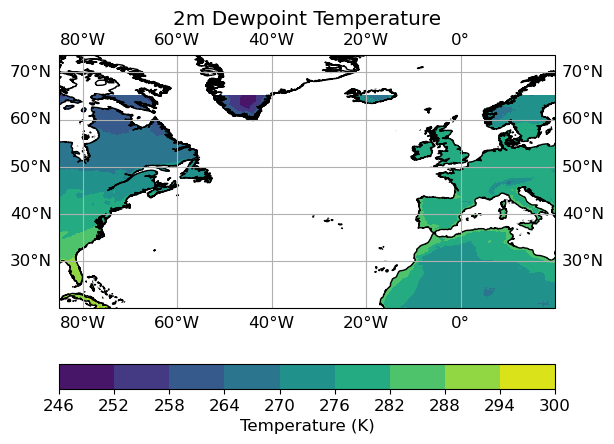

<Figure size 640x480 with 0 Axes>

In [54]:
import cartopy.crs as ccrs

ds = xr.open_dataset(r"C:\Users\itsna\OneDrive\Desktop\MSc Work\atlantic_uk_na.nc")

long = ds.variables['longitude'][:]
lat = ds.variables['latitude'][:]

data = ds.d2m.values
mean_temp = np.mean(data, axis=0)

ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-85, 20, 20, 65])
ax.set_title('2m Dewpoint Temperature')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(long, lat, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Temperature (K)")

plt.figure()
plt.show()

The region covered by this dataset is much larger than intended, next time I'll try to reduce the geospacial area selected for the file to cover just the UK, Atlantic ocean and the east coast of North America only.